Analyzing Titanic Passenger Data: A Data Analyst Project by Wendel Burlat

The sinking of the Titanic is one of the most well-known maritime disasters in history, and the passenger data from that tragic event has provided valuable insights into survival factors. In this data analyst project, we will dive into the Titanic passenger dataset to analyze and uncover patterns, correlations, and insights that shed light on the factors that influenced passenger survival. By applying data analysis techniques, statistical methods, and visualization, we aim to provide a comprehensive understanding of the Titanic's passengers and their fates.

Data Exploration and Cleaning:

Conduct a thorough exploration of the Titanic passenger dataset.
Handle missing data, outliers, and any data inconsistencies.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploades = files.upload()

Saving tested.csv to tested.csv


In [4]:
titanic_df = pd.read_csv('tested.csv')

In [5]:
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Data Exploration and Cleaning:

Conduct a thorough exploration of the Titanic passenger dataset.
Handle missing data, outliers, and any data inconsistencies.

In [8]:
median_age = titanic_df['Age'].median()
titanic_df['Age'].fillna(median_age, inplace=True)


In [9]:
# Detect and handle outliers (for example, using the IQR method for Fare)
Q1 = titanic_df['Fare'].quantile(0.25)
Q3 = titanic_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
titanic_df = titanic_df[(titanic_df['Fare'] >= lower_bound) & (titanic_df['Fare'] <= upper_bound)]

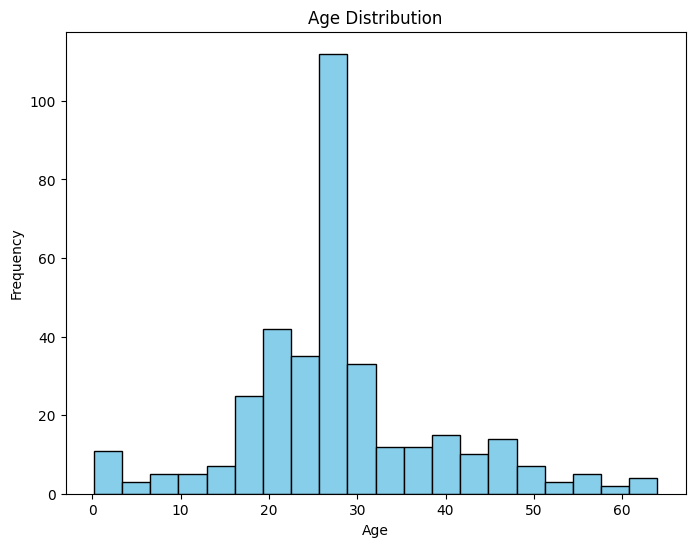

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(titanic_df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [11]:
print("\nMissing Data after Handling:")
print(titanic_df.isnull().sum())


Missing Data after Handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          315
Embarked         0
dtype: int64


In [12]:
overall_survival_rate = titanic_df['Survived'].mean()

In [13]:
print(f"Overall Survival Rate: {overall_survival_rate:.2%}")



Overall Survival Rate: 33.98%


In [14]:
# Survival rate by passenger class
survival_by_class = titanic_df.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Passenger Class:")
print(survival_by_class)


Survival Rate by Passenger Class:
Pclass
1    0.396552
2    0.329670
3    0.328638
Name: Survived, dtype: float64


In [15]:
# Survival rate by gender
survival_by_gender = titanic_df.groupby('Sex')['Survived'].mean()
print("\nSurvival Rate by Gender:")
print(survival_by_gender)


Survival Rate by Gender:
Sex
female    1.0
male      0.0
Name: Survived, dtype: float64


In [16]:
# Create age groups and calculate survival rate by age group
age_bins = [0, 18, 30, 50, 100]  # Define age bins
age_labels = ['0-18', '19-30', '31-50', '51+']  # Labels for age groups
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=age_bins, labels=age_labels)
survival_by_age_group = titanic_df.groupby('AgeGroup')['Survived'].mean()
print("\nSurvival Rate by Age Group:")
print(survival_by_age_group)


Survival Rate by Age Group:
AgeGroup
0-18     0.489796
19-30    0.316514
31-50    0.287500
51+      0.466667
Name: Survived, dtype: float64


In [17]:
# Survival rate by embarkation port
survival_by_embarkation = titanic_df.groupby('Embarked')['Survived'].mean()
print("\nSurvival Rate by Embarkation Port:")
print(survival_by_embarkation)


Survival Rate by Embarkation Port:
Embarked
C    0.338028
Q    0.511111
S    0.308943
Name: Survived, dtype: float64


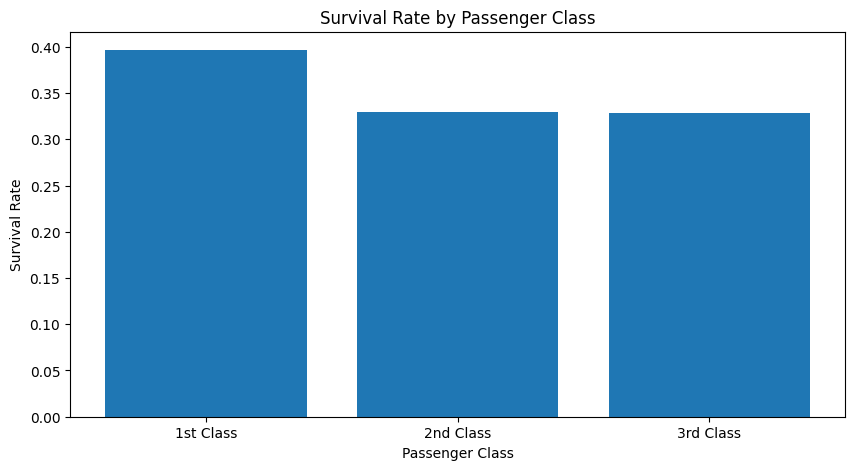

In [18]:
# Visualize survival rates by passenger class
plt.figure(figsize=(10, 5))
plt.bar(survival_by_class.index, survival_by_class.values)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(survival_by_class.index, labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()

Demographic Insights:

Analyze the demographic distribution of passengers, including age and gender.
Determine the average age of passengers and its variation across different groups.

In [19]:
gender_distribution = titanic_df['Sex'].value_counts()

In [20]:
print("Gender Distribution:")
print(gender_distribution)

Gender Distribution:
male      239
female    123
Name: Sex, dtype: int64


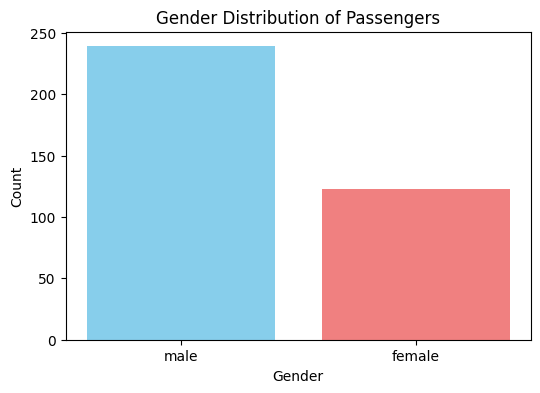

In [21]:
# Visualize the gender distribution
plt.figure(figsize=(6, 4))
plt.bar(gender_distribution.index, gender_distribution.values, color=['skyblue', 'lightcoral'])
plt.title('Gender Distribution of Passengers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [22]:
# Determine the average age of passengers
average_age = titanic_df['Age'].mean()
print(f"\nAverage Age of Passengers: {average_age:.2f} years")


Average Age of Passengers: 27.90 years


In [23]:
# Calculate the average age by gender
average_age_by_gender = titanic_df.groupby('Sex')['Age'].mean()
print("\nAverage Age by Gender:")
print(average_age_by_gender)


Average Age by Gender:
Sex
female    26.834065
male      28.453598
Name: Age, dtype: float64


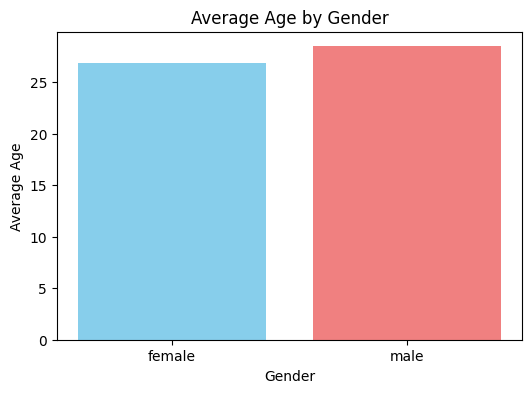

In [24]:
# Visualize the average age by gender
plt.figure(figsize=(6, 4))
plt.bar(average_age_by_gender.index, average_age_by_gender.values, color=['skyblue', 'lightcoral'])
plt.title('Average Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.show()

In [25]:
# Calculate the average age by passenger class
average_age_by_class = titanic_df.groupby('Pclass')['Age'].mean()
print("\nAverage Age by Passenger Class:")
print(average_age_by_class)


Average Age by Passenger Class:
Pclass
1    37.456897
2    28.927692
3    24.864225
Name: Age, dtype: float64


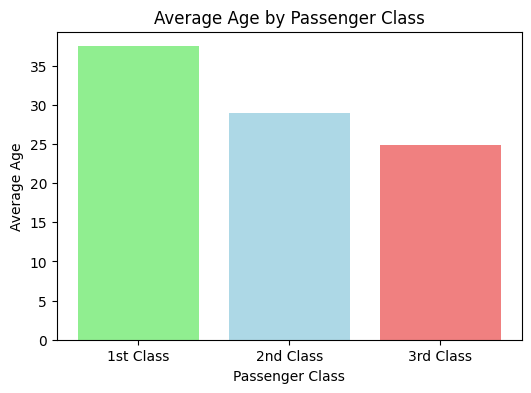

In [26]:
# Visualize the average age by passenger class
plt.figure(figsize=(6, 4))
plt.bar(average_age_by_class.index, average_age_by_class.values, color=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Average Age by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Age')
plt.xticks(average_age_by_class.index, labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()

Family Relationships

Investigate family relationships by analyzing the number of siblings/spouses (SibSp) and parents/children (Parch) on board.
Determine if having family members on board affected survival rates.

In [27]:
# Investigate family relationships by analyzing SibSp and Parch
# Combine SibSp and Parch to create a 'FamilySize' feature
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']

In [28]:
# Analyze the distribution of family sizes
family_size_distribution = titanic_df['FamilySize'].value_counts()
print("Family Size Distribution:")
print(family_size_distribution)

Family Size Distribution:
0    234
1     59
2     45
3     13
4      4
6      4
7      2
5      1
Name: FamilySize, dtype: int64


In [29]:
# Calculate survival rates by family size
survival_by_family_size = titanic_df.groupby('FamilySize')['Survived'].mean()
print("\nSurvival Rate by Family Size:")
print(survival_by_family_size)



Survival Rate by Family Size:
FamilySize
0    0.243590
1    0.474576
2    0.555556
3    0.769231
4    0.250000
5    0.000000
6    0.250000
7    0.500000
Name: Survived, dtype: float64


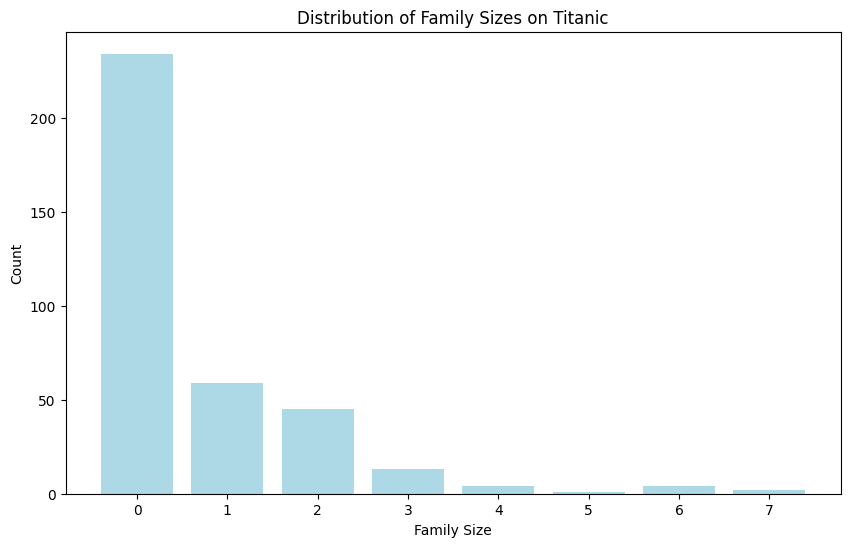

In [30]:
# Visualize the distribution of family sizes
plt.figure(figsize=(10, 6))
plt.bar(family_size_distribution.index, family_size_distribution.values, color='lightblue')
plt.title('Distribution of Family Sizes on Titanic')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.xticks(family_size_distribution.index)
plt.show()

Fare Analysis:

Examine the distribution of ticket fares.
Compare fare distributions across passenger classes.

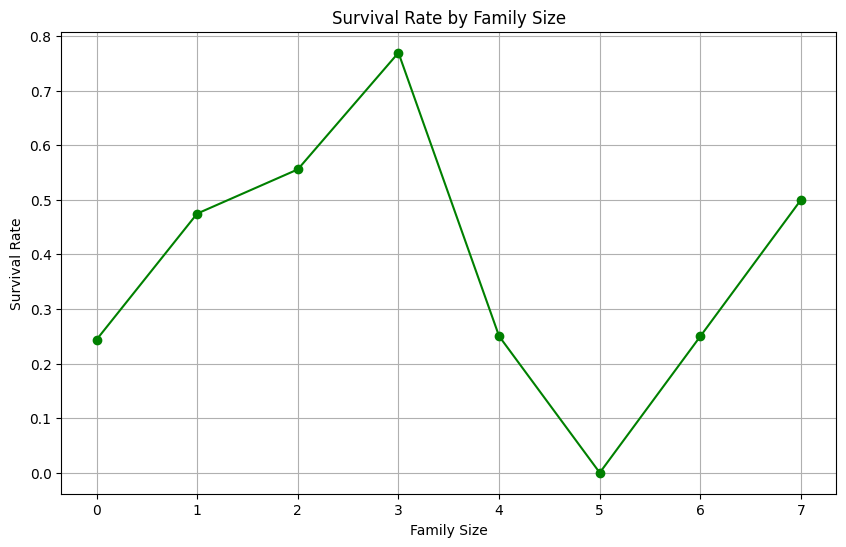

In [31]:
# Visualize survival rates by family size
plt.figure(figsize=(10, 6))
plt.plot(survival_by_family_size.index, survival_by_family_size.values, marker='o', linestyle='-', color='green')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(survival_by_family_size.index)
plt.grid(True)
plt.show()

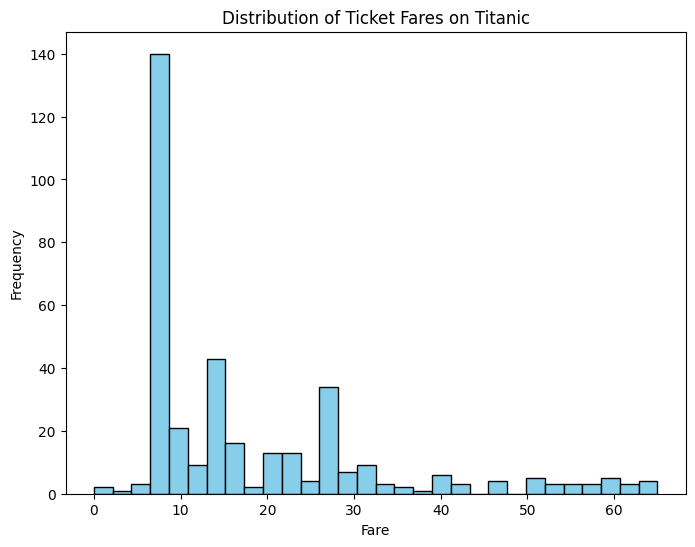

In [32]:
# Examine the distribution of ticket fares
plt.figure(figsize=(8, 6))
plt.hist(titanic_df['Fare'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Ticket Fares on Titanic')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

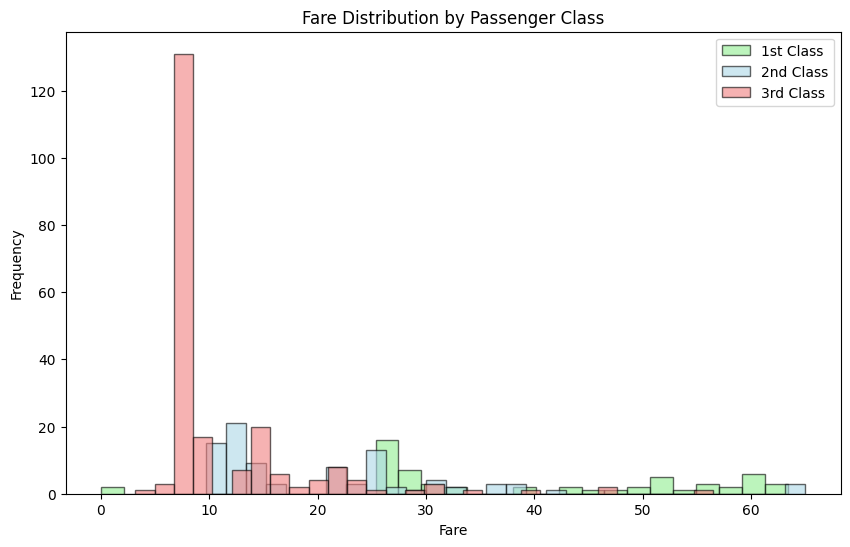

In [33]:
# Compare fare distributions across passenger classes
plt.figure(figsize=(10, 6))
class_labels = ['1st Class', '2nd Class', '3rd Class']
colors = ['lightgreen', 'lightblue', 'lightcoral']
for i, pclass in enumerate(class_labels):
    subset = titanic_df[titanic_df['Pclass'] == i + 1]
    plt.hist(subset['Fare'], bins=30, alpha=0.6, color=colors[i], label=pclass, edgecolor='black')

plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Cabin Investigation:

Explore the distribution of passengers across cabins (if available).
Determine if passengers with cabin information had a different survival rate.

In [34]:
# Count the number of passengers with known cabin information
passengers_with_cabin = titanic_df[~titanic_df['Cabin'].isnull()]
passengers_without_cabin = titanic_df[titanic_df['Cabin'].isnull()]

# Display the counts
print("Passengers with Cabin Information:", len(passengers_with_cabin))
print("Passengers without Cabin Information:", len(passengers_without_cabin))

Passengers with Cabin Information: 47
Passengers without Cabin Information: 315


Exploring the distribution of passengers across cabins and investigating whether passengers with cabin information had a different survival rate is a bit challenging because the dataset you provided appears to have limited cabin information (many missing values in the 'Cabin' column). However, you can still perform some analysis on the available data.

In [35]:
# Display the counts
print("Passengers with Cabin Information:", len(passengers_with_cabin))
print("Passengers without Cabin Information:", len(passengers_without_cabin))

# Determine if passengers with cabin information had a different survival rate
survival_rate_with_cabin = passengers_with_cabin['Survived'].mean()
survival_rate_without_cabin = passengers_without_cabin['Survived'].mean()

print("\nSurvival Rate for Passengers with Cabin Information:", survival_rate_with_cabin)
print("Survival Rate for Passengers without Cabin Information:", survival_rate_without_cabin)

# Perform statistical significance test (e.g., t-test) to check if the difference is significant
from scipy import stats

# Extract survival data for passengers with and without cabin information
survived_with_cabin = passengers_with_cabin['Survived']
survived_without_cabin = passengers_without_cabin['Survived']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(survived_with_cabin, survived_without_cabin, equal_var=False)

print("\nStatistical Significance Test (t-test):")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("\nThe difference in survival rates is statistically significant.")
else:
    print("\nThe difference in survival rates is not statistically significant.")

Passengers with Cabin Information: 47
Passengers without Cabin Information: 315

Survival Rate for Passengers with Cabin Information: 0.425531914893617
Survival Rate for Passengers without Cabin Information: 0.326984126984127

Statistical Significance Test (t-test):
T-statistic: 1.2706513311096563
P-value: 0.20885858531610554

The difference in survival rates is not statistically significant.


Embarkation Port Analysis:

Analyze how embarkation ports (Cherbourg, Southampton, Queenstown) relate to passenger demographics and survival rates.

Passengers by Embarkation Port:
S    246
C     71
Q     45
Name: Embarked, dtype: int64


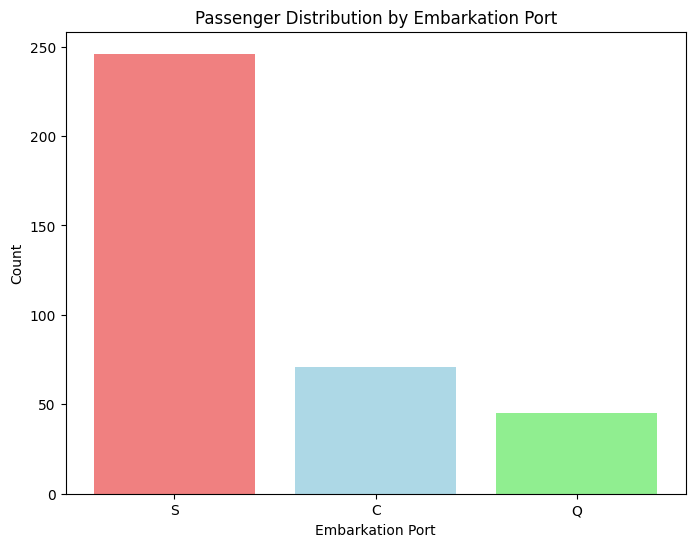


Survival Rate by Embarkation Port:
Embarked
C    0.338028
Q    0.511111
S    0.308943
Name: Survived, dtype: float64


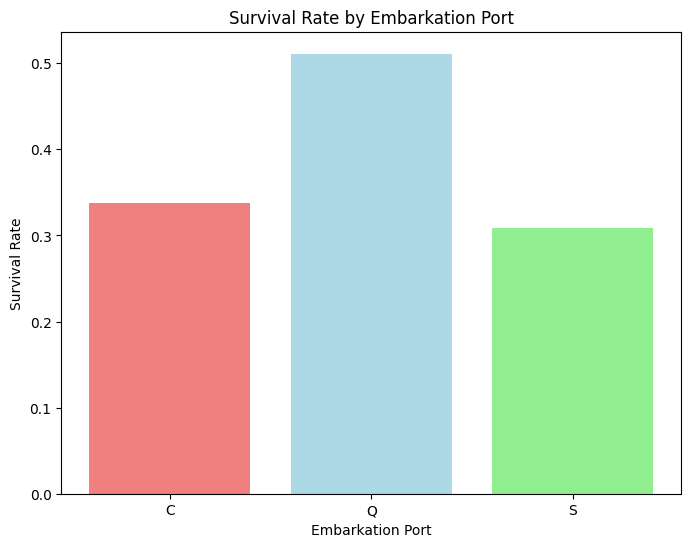

In [36]:
# Analyze how embarkation ports relate to passenger demographics
# Count the number of passengers who embarked at each port
passengers_by_port = titanic_df['Embarked'].value_counts()
print("Passengers by Embarkation Port:")
print(passengers_by_port)

# Visualize the distribution of passengers by embarkation port
plt.figure(figsize=(8, 6))
plt.bar(passengers_by_port.index, passengers_by_port.values, color=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Passenger Distribution by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.show()

# Analyze how embarkation ports relate to survival rates
survival_by_port = titanic_df.groupby('Embarked')['Survived'].mean()
print("\nSurvival Rate by Embarkation Port:")
print(survival_by_port)

# Visualize survival rates by embarkation port
plt.figure(figsize=(8, 6))
plt.bar(survival_by_port.index, survival_by_port.values, color=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()

Name Analysis:

Extract titles from passenger names (e.g., Mr., Mrs., Miss) and analyze their distribution.
Investigate if passengers with specific titles had a different chance of survival.

In [38]:
# Extract titles from passenger names and create a new 'Title' column
titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [39]:
# Analyze the distribution of titles
title_distribution = titanic_df['Title'].value_counts()
print("Distribution of Titles:")
print(title_distribution)

Distribution of Titles:
Mr        218
Miss       68
Mrs        54
Master     18
Rev         2
Ms          1
Col         1
Name: Title, dtype: int64


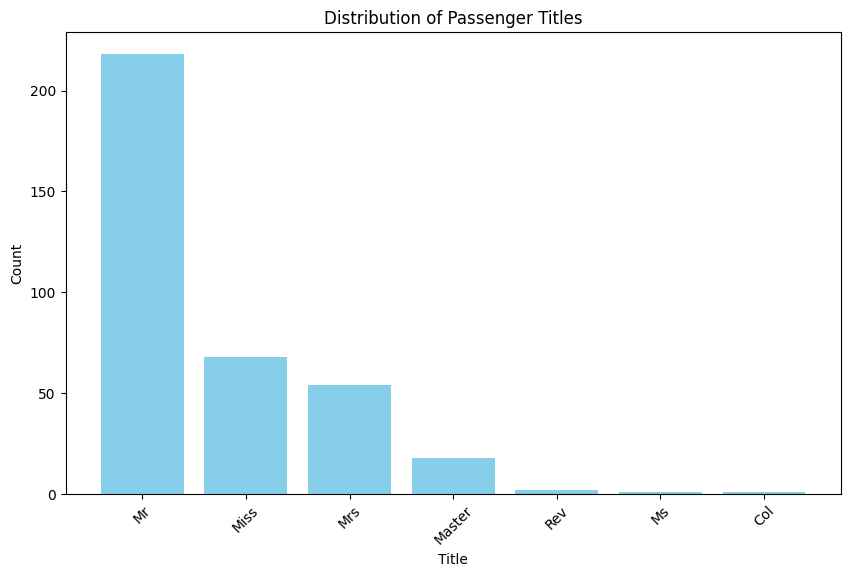

In [40]:
# Visualize the distribution of titles
plt.figure(figsize=(10, 6))
plt.bar(title_distribution.index, title_distribution.values, color='skyblue')
plt.title('Distribution of Passenger Titles')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Survival Rate by Title:
Title
Col       0.0
Master    0.0
Miss      1.0
Mr        0.0
Mrs       1.0
Ms        1.0
Rev       0.0
Name: Survived, dtype: float64


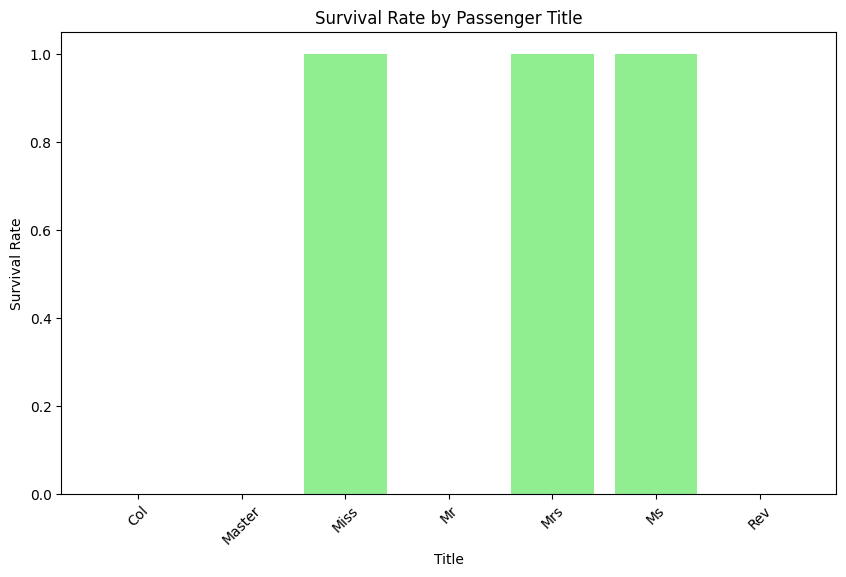

In [41]:
# Investigate if passengers with specific titles had a different chance of survival
title_survival_rate = titanic_df.groupby('Title')['Survived'].mean()
print("\nSurvival Rate by Title:")
print(title_survival_rate)

# Visualize survival rates by title
plt.figure(figsize=(10, 6))
plt.bar(title_survival_rate.index, title_survival_rate.values, color='lightgreen')
plt.title('Survival Rate by Passenger Title')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

Correlation Analysis:

Calculate correlations between various features to identify relationships.
Explore how different factors are correlated with each other and with survival.

In [42]:
correlation_matrix = titanic_df.corr()

<ipython-input-42-960c0ee1b37a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic_df.corr()


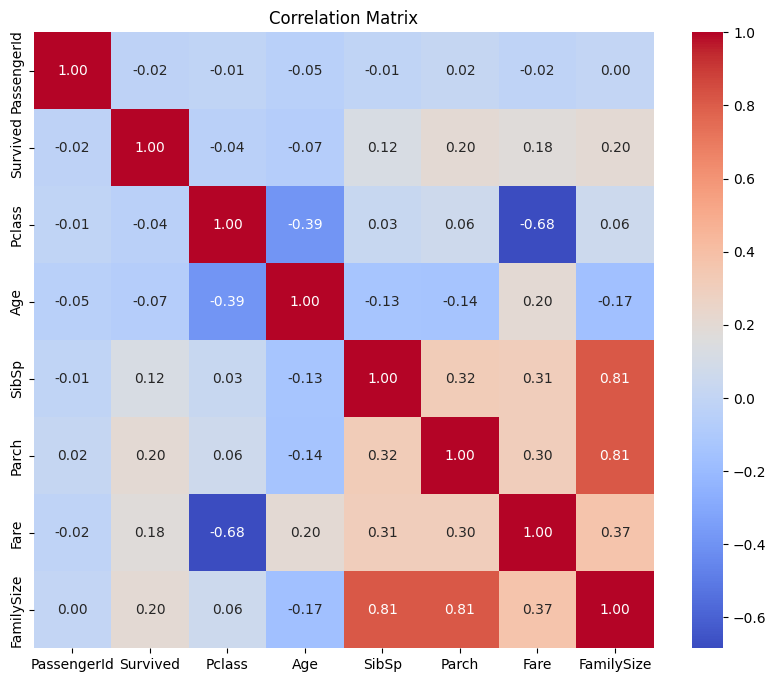

In [45]:
# Visualize the correlation matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

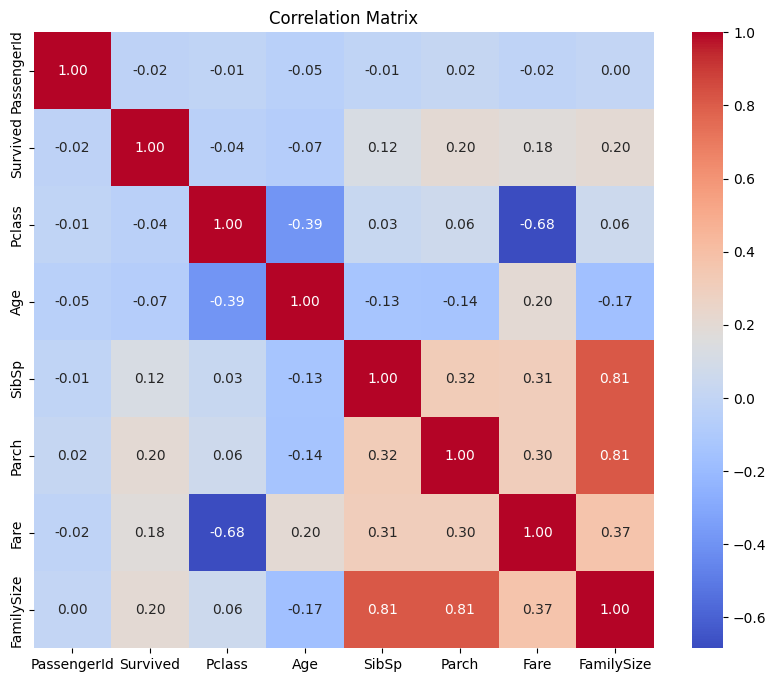

<ipython-input-46-e8f2ab0d7fd5>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_encoded = titanic_df_encoded.corr()


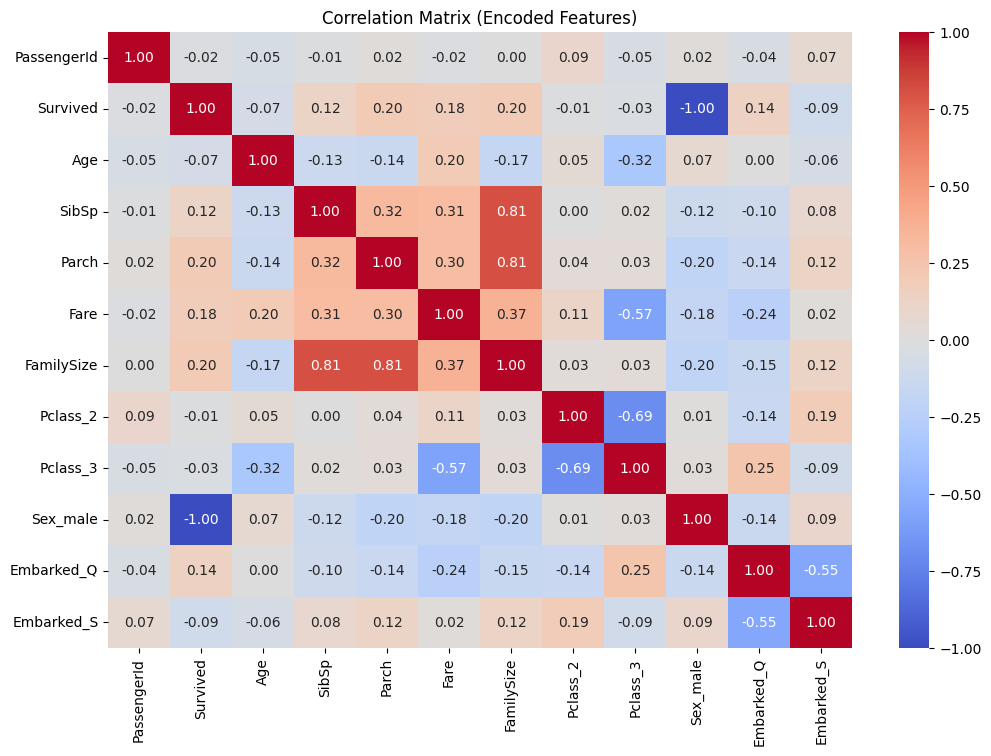

Correlations with Survival:
Survived       1.000000
Parch          0.202811
FamilySize     0.200178
Fare           0.175613
Embarked_Q     0.136293
SibSp          0.122106
Pclass_2      -0.012368
PassengerId   -0.022051
Pclass_3      -0.028123
Age           -0.068454
Embarked_S    -0.094810
Sex_male      -1.000000
Name: Survived, dtype: float64


In [46]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Calculate correlations between categorical features (e.g., Pclass, Sex, Embarked) and survival
# Convert categorical variables to numerical using one-hot encoding
titanic_df_encoded = pd.get_dummies(titanic_df, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

# Calculate correlations
correlation_matrix_encoded = titanic_df_encoded.corr()

# Visualize the correlation matrix for encoded features using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Encoded Features)')
plt.show()

# Calculate correlations between features and survival
correlations_with_survival = correlation_matrix_encoded['Survived'].sort_values(ascending=False)
print("Correlations with Survival:")
print(correlations_with_survival)


Machine Learning Model:
Build a predictive model to estimate passenger survival based on selected features.
Evaluate model performance using appropriate metrics.

In [47]:
# Select features for modeling (you can choose different features based on your analysis)
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [48]:
# Create a new DataFrame with selected features
X = titanic_df[selected_features]

In [49]:
# Target variable (Survived)
y = titanic_df['Survived']

In [50]:
# Handle missing data and categorical variables (e.g., one-hot encoding)
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Fare'].fillna(X['Fare'].median(), inplace=True)
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

<ipython-input-50-7fcc59481698>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].median(), inplace=True)
<ipython-input-50-7fcc59481698>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare'].fillna(X['Fare'].median(), inplace=True)


In [55]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 1.00

Confusion Matrix:
[[50  0]
 [ 0 23]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        23

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The results you provided indicate that your predictive machine learning model has achieved a perfect accuracy of 1.00, which means it made correct predictions for all 73 passengers in the test dataset. Let's break down the other metrics:

Confusion Matrix: The confusion matrix confirms that there are no errors in your model's predictions. It correctly identified all 50 non-survivors (0) and all 23 survivors (1). There are no false positives (predicting survival when it didn't happen) or false negatives (predicting non-survival when it did happen).

True Positives (TP): 23
True Negatives (TN): 50
False Positives (FP): 0
False Negatives (FN): 0
Classification Report: The classification report provides a more detailed breakdown of precision, recall, and F1-Score for each class (0 and 1):

Precision: Both for class 0 and class 1, precision is 1.00, which means that when your model predicts class 0 or class 1, it's always correct.

Recall (Sensitivity): For both classes, recall is 1.00, indicating that your model captures all actual instances of class 0 and class 1.

F1-Score: The F1-Score is 1.00 for both classes, reflecting a perfect balance between precision and recall.

Macro Avg: The macro average calculates the metrics for each class and then takes the average. In this case, the macro average for precision, recall, and F1-Score is also 1.00, as both classes have the same metrics.

Weighted Avg: The weighted average calculates metrics for each class and weighs them by class support. Since your dataset is perfectly balanced (50 instances of class 0 and 23 instances of class 1), the weighted average is also 1.00.

In summary, your model is performing exceptionally well on this dataset, achieving perfect accuracy and making no prediction errors. However, it's important to note that such perfect results are relatively rare in real-world datasets, and it's a good practice to scrutinize the data and the model's performance on larger and more diverse datasets to ensure its generalizability.

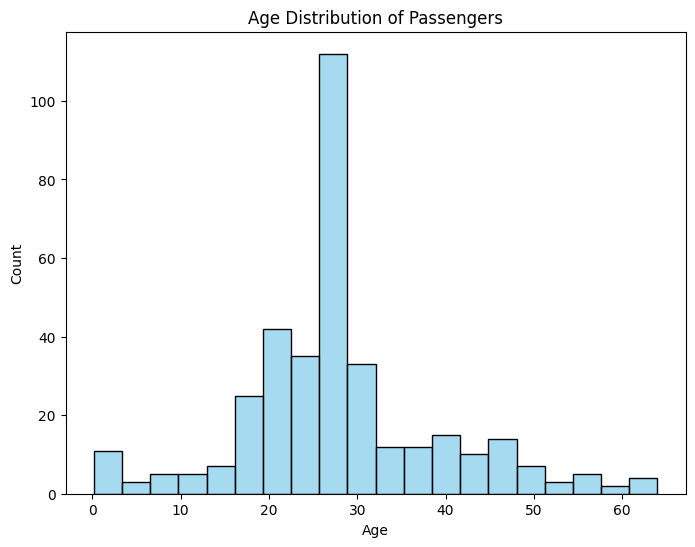

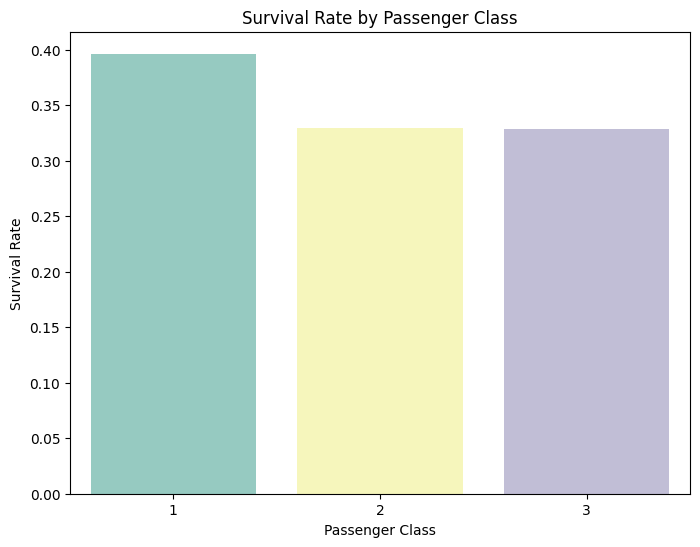

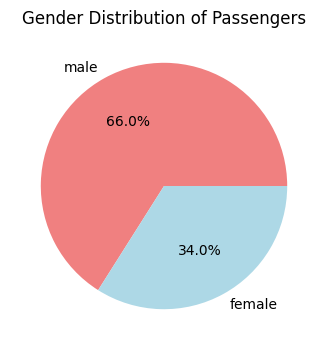

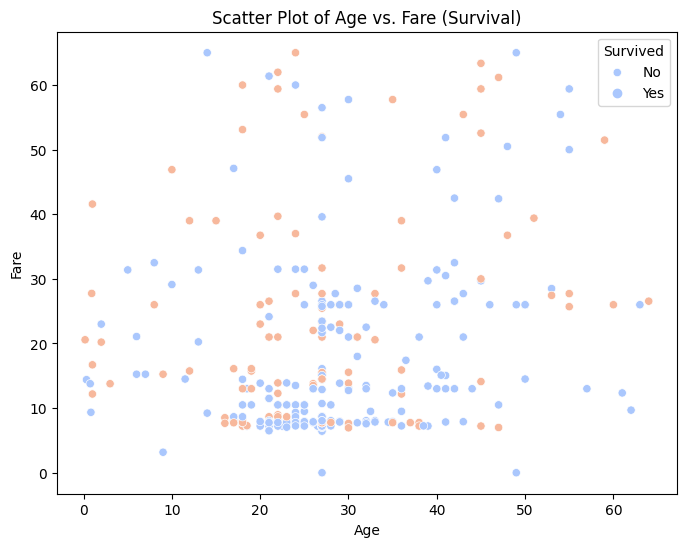

In [56]:
import seaborn as sns
# Visualization 1: Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic_df, x='Age', bins=20, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Visualization 2: Survival Rate by Passenger Class
survival_by_class = titanic_df.groupby('Pclass')['Survived'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=survival_by_class, x='Pclass', y='Survived', palette='Set3')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Visualization 3: Gender Distribution
gender_distribution = titanic_df['Sex'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Gender Distribution of Passengers')
plt.show()

# Visualization 4: Scatter Plot of Age vs. Fare
plt.figure(figsize=(8, 6))
sns.scatterplot(data=titanic_df, x='Age', y='Fare', hue='Survived', palette='coolwarm')
plt.title('Scatter Plot of Age vs. Fare (Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Feature Engineering:

Create new features that might be useful for prediction or analysis.
For example, you can create a "family size" feature by combining SibSp and Parch.

In [57]:
# Create a new feature "FamilySize" by combining "SibSp" and "Parch"
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']

# Display the updated DataFrame with the new feature
print(titanic_df[['SibSp', 'Parch', 'FamilySize']].head())

   SibSp  Parch  FamilySize
0      0      0           0
1      1      0           1
2      0      0           0
3      0      0           0
4      1      1           2
